In this project, we examined the structural properties of proteins.
The steps we follow are: the relation of the columns with each other,
visualizing the data, Split data into training and test set,
working with outliers values, catching missing data and working on it.


## Content
* *Exploratory data analysis*
* *Visualization*
* *Split data into training and test set*
* *Outliers Detection*
* *Missing Value*

In [105]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
!pip install missingno
import missingno as msno
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        


# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
file=pd.read_csv("../input/protein-data-set/pdb_data_no_dups.csv")


file.head() 

df = pd.DataFrame(file)
print(df.shape)

 
 

/kaggle/input/protein-data-set/pdb_data_no_dups.csv
/kaggle/input/protein-data-set/pdb_data_seq.csv
(141401, 14)


In [107]:
total_rows = df.count   
print (total_rows) 

<bound method DataFrame.count of        structureId                            classification  \
0             100D                            DNA-RNA HYBRID   
1             101D                                       DNA   
2             101M                          OXYGEN TRANSPORT   
3             102D                                       DNA   
4             102L                     HYDROLASE(O-GLYCOSYL)   
...            ...                                       ...   
141396        9RUB                      LYASE(CARBON-CARBON)   
141397        9TNA                                     T-RNA   
141398        9WGA                       LECTIN (AGGLUTININ)   
141399        9XIA  ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE)   
141400        9XIM  ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE)   

       experimentalTechnique macromoleculeType  residueCount  resolution  \
0          X-RAY DIFFRACTION    DNA/RNA Hybrid            20        1.90   
1          X-RAY DIFFRACTION               DNA

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141401 entries, 0 to 141400
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               141401 non-null  object 
 1   classification            141399 non-null  object 
 2   experimentalTechnique     141401 non-null  object 
 3   macromoleculeType         137636 non-null  object 
 4   residueCount              141401 non-null  int64  
 5   resolution                128589 non-null  float64
 6   structureMolecularWeight  141401 non-null  float64
 7   crystallizationMethod     96242 non-null   object 
 8   crystallizationTempK      97039 non-null   float64
 9   densityMatthews           124724 non-null  float64
 10  densityPercentSol         124749 non-null  float64
 11  pdbxDetails               118534 non-null  object 
 12  phValue                   105110 non-null  float64
 13  publicationYear           117602 non-null  f

In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
residueCount,141401.0,825.374849,2136.461080,0.00,226.00,414.00,820.00,313236.0
resolution,128589.0,2.263807,1.410878,0.48,1.80,2.10,2.50,70.0
structureMolecularWeight,141401.0,112079.000614,569015.201457,314.38,26128.56,47477.79,94084.84,97730536.0
crystallizationTempK,97039.0,290.967713,9.541080,4.00,290.00,293.00,295.00,398.0
densityMatthews,124724.0,2.670267,0.783740,0.00,2.21,2.49,2.91,99.0
densityPercentSol,124749.0,51.353163,10.104561,0.00,44.37,50.50,57.71,92.0
phValue,105110.0,6.788685,2.556819,0.00,6.00,7.00,7.50,724.0
publicationYear,117602.0,2008.922365,8.459286,201.00,2005.00,2010.00,2014.00,2018.0


In [110]:
spec_chars = ["!",'"',"#","%","&","'","(",")",      
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]

for char in spec_chars:
    df['classification'] = df['classification'].str.replace(char, ' ')  



In [111]:
df.isnull().values.any() 

True

In [112]:
df.notnull().sum()  

structureId                 141401
classification              141399
experimentalTechnique       141401
macromoleculeType           137636
residueCount                141401
resolution                  128589
structureMolecularWeight    141401
crystallizationMethod        96242
crystallizationTempK         97039
densityMatthews             124724
densityPercentSol           124749
pdbxDetails                 118534
phValue                     105110
publicationYear             117602
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d9b79aa50>,
      dtype=object)

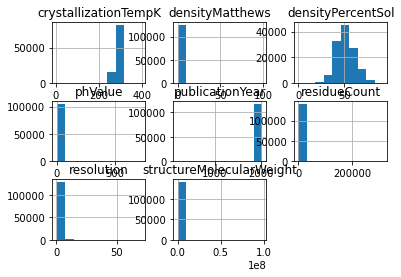

In [113]:
df.hist()


In [114]:
df.dtypes

structureId                  object
classification               object
experimentalTechnique        object
macromoleculeType            object
residueCount                  int64
resolution                  float64
structureMolecularWeight    float64
crystallizationMethod        object
crystallizationTempK        float64
densityMatthews             float64
densityPercentSol           float64
pdbxDetails                  object
phValue                     float64
publicationYear             float64
dtype: object

In [115]:
kategorik=df.select_dtypes(include=["object"]) 
kategorik.dtypes

structureId              object
classification           object
experimentalTechnique    object
macromoleculeType        object
crystallizationMethod    object
pdbxDetails              object
dtype: object

In [116]:
numerik=df.select_dtypes(include=["float64","int64"]) 
numerik.dtypes

residueCount                  int64
resolution                  float64
structureMolecularWeight    float64
crystallizationTempK        float64
densityMatthews             float64
densityPercentSol           float64
phValue                     float64
publicationYear             float64
dtype: object

In [117]:
df.structureId=pd.Categorical(df.structureId)
df.classification=pd.Categorical(df.classification)
df.experimentalTechnique=pd.Categorical(df.experimentalTechnique)
df.macromoleculeType=pd.Categorical(df.macromoleculeType)
df.crystallizationMethod =pd.Categorical(df.crystallizationMethod )
df.pdbxDetails=pd.Categorical(df.pdbxDetails)
df.dtypes

structureId                 category
classification              category
experimentalTechnique       category
macromoleculeType           category
residueCount                   int64
resolution                   float64
structureMolecularWeight     float64
crystallizationMethod       category
crystallizationTempK         float64
densityMatthews              float64
densityPercentSol            float64
pdbxDetails                 category
phValue                      float64
publicationYear              float64
dtype: object

#  Data Visualation

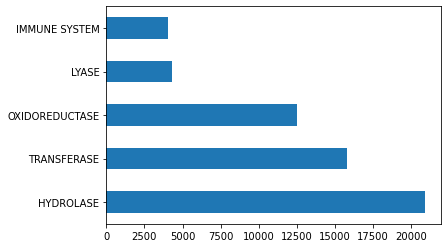

In [118]:
x = df.classification.value_counts().head(5)
df["classification"].value_counts().head().plot.barh();


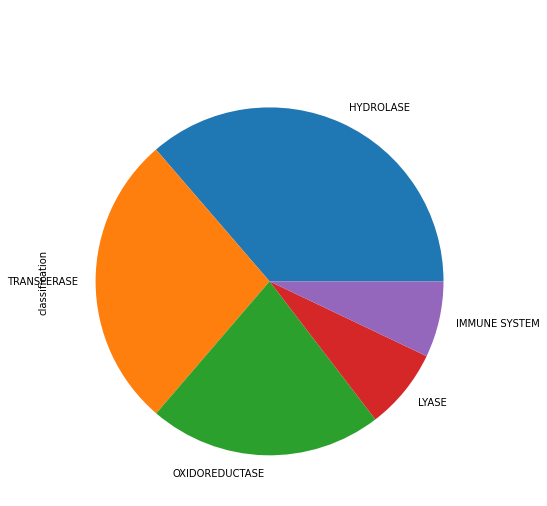

In [119]:
df.classification.value_counts().head().plot(kind='pie', subplots=True, figsize=(8, 8), title = " ");


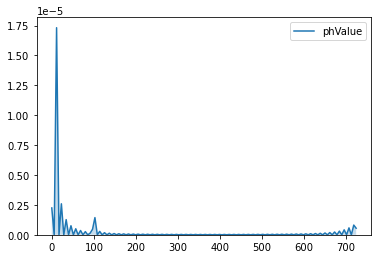

In [120]:
sns.kdeplot(df.phValue,shade=True);

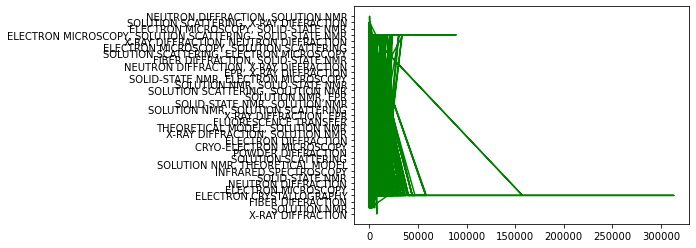

In [121]:
plt.plot(df.residueCount,df.experimentalTechnique,color="green");

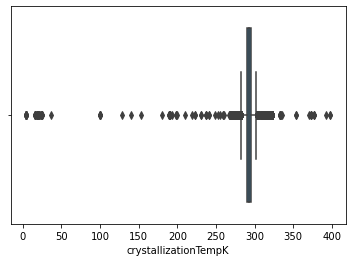

In [122]:
sns.boxplot(df["crystallizationTempK"]);

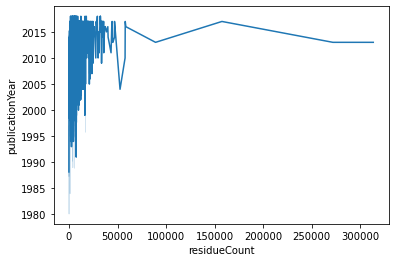

In [123]:
sns.lineplot(x="residueCount",y="publicationYear",data=df);

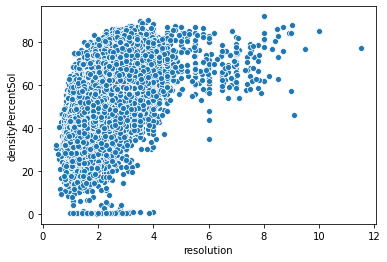

In [128]:
sns.scatterplot(x="resolution",y="densityPercentSol",data=df);

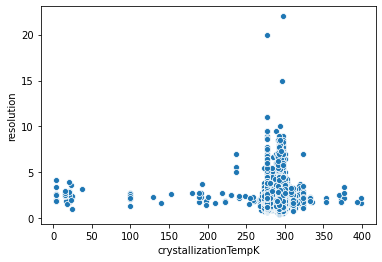

In [124]:
sns.scatterplot(x="crystallizationTempK", y="resolution",data=df);


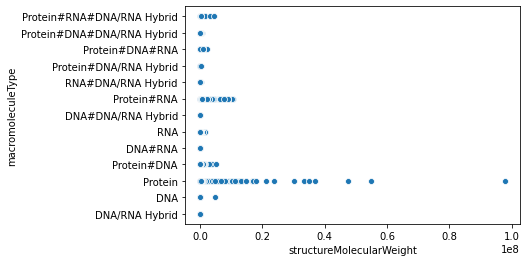

In [125]:
sns.scatterplot(x="structureMolecularWeight",y="macromoleculeType",data=df);


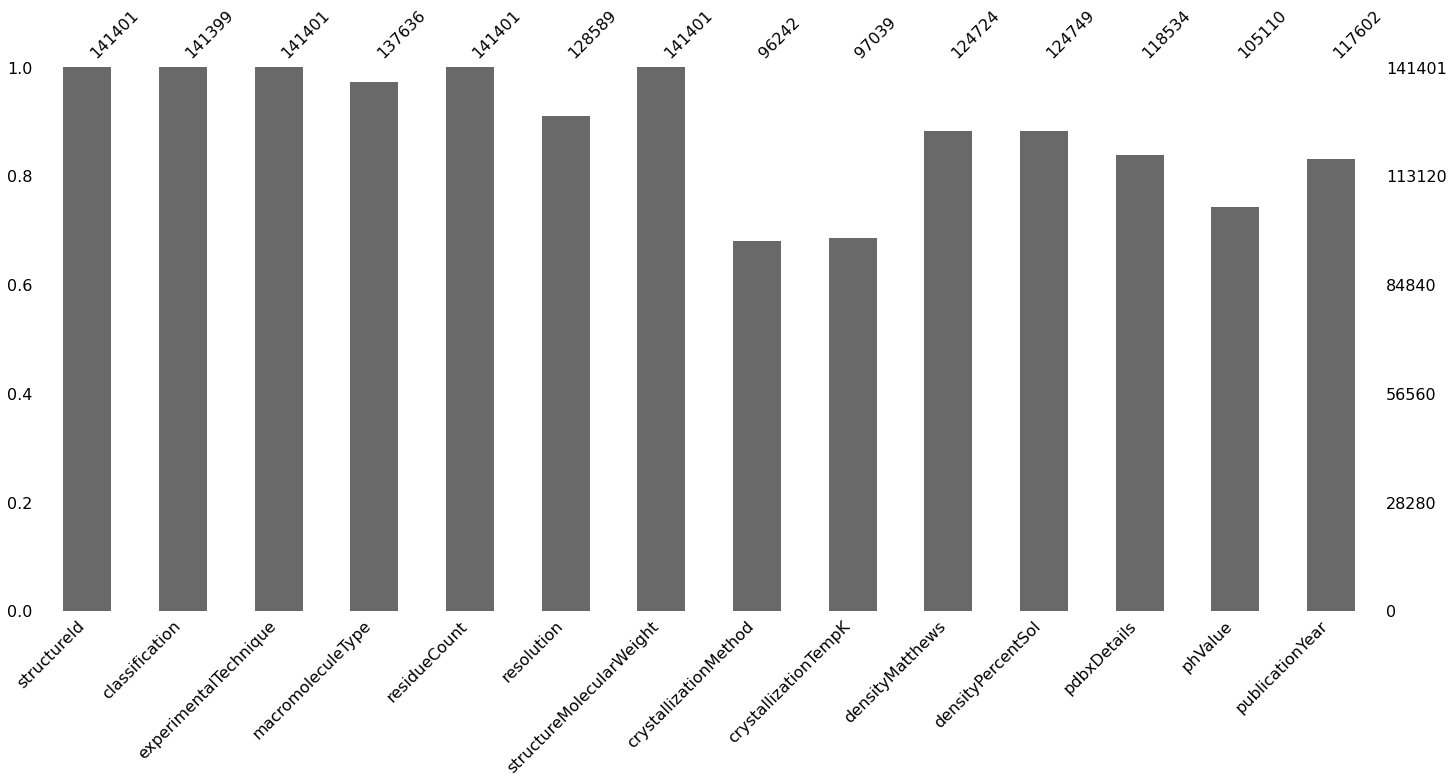

In [126]:
msno.bar(df);

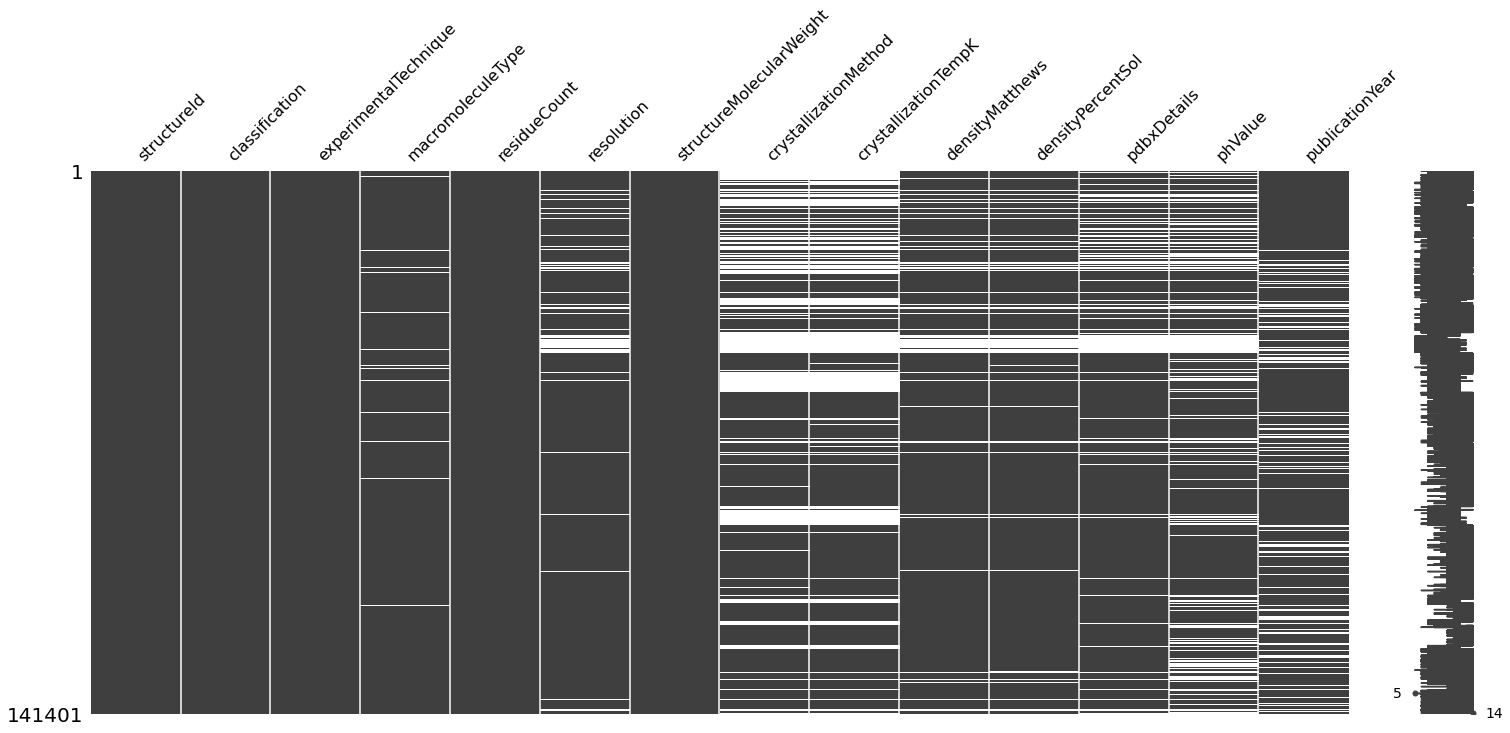

In [127]:
msno.matrix(df);

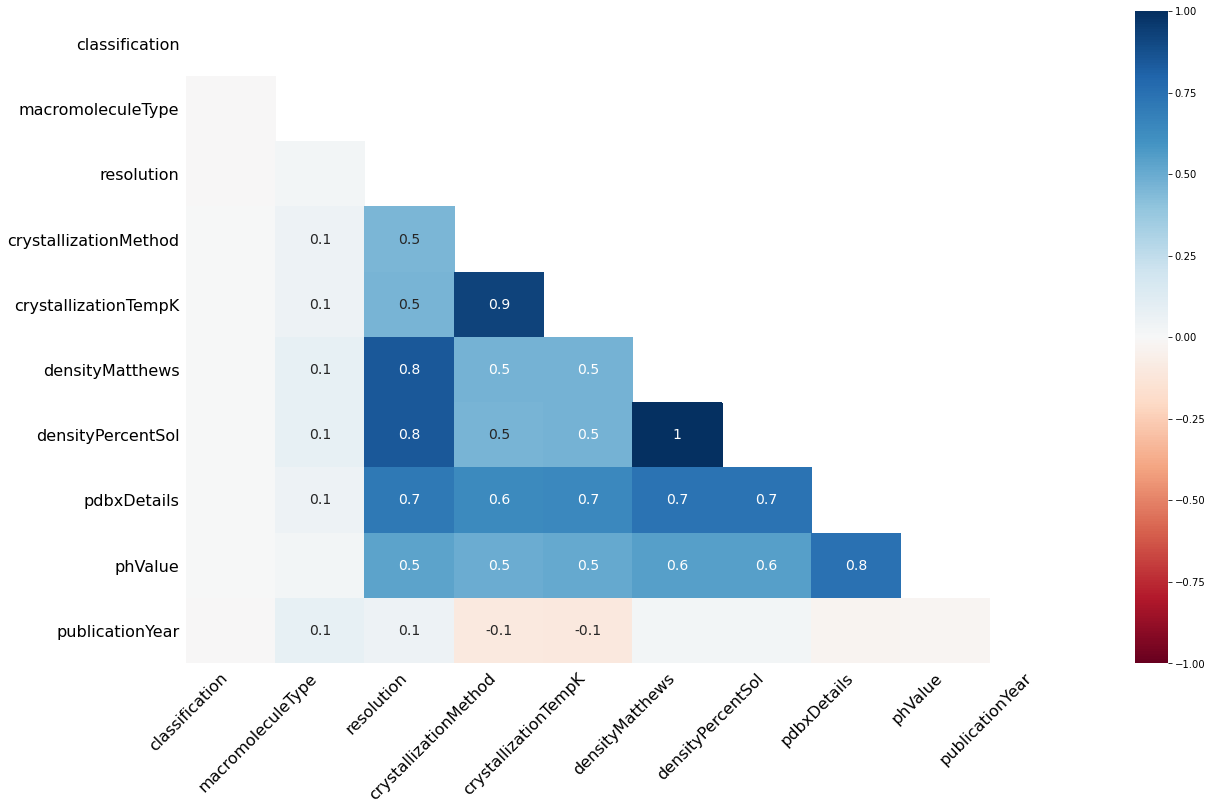

In [129]:
msno.heatmap(df);

# Outlier Detection

In [130]:
y = df["classification"]
x = df.drop("classification", 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train=x_train.select_dtypes(include=["float64","int64"])
x_test=x_test.select_dtypes(include=["float64","int64"])

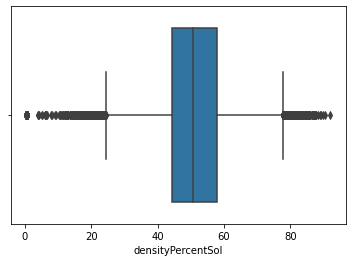

In [131]:
DPS_table=x_train["densityPercentSol"]
sns.boxplot(x=DPS_table);

In [132]:
Q1=DPS_table.quantile(0.25) 
Q3=DPS_table.quantile(0.75) 
IQR=Q3-Q1                   
lower_bound=Q1-1.5*IQR      
upper_bound=Q3+1.5*IQR      
print(Q1)
print(Q3)

44.37
57.73


In [133]:
outliers_vector=(DPS_table<(lower_bound)) | (DPS_table> (upper_bound))
outliers_vector

outliers=DPS_table[outliers_vector]

outliers
outliers.index

DPS_table.shape

(113120,)

In [134]:
for e in range (len(DPS_table)):
    if DPS_table.iloc[e]<lower_bound:
        DPS_table.iloc[e]=lower_bound*0.75
    elif DPS_table.iloc[e]>upper_bound:
        DPS_table.iloc[e]=upper_bound*1.25
        
DPS_table.min()
DPS_table.max()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


97.21249999999999

# Missing Value Imputation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d9c777590>,
      dtype=object)

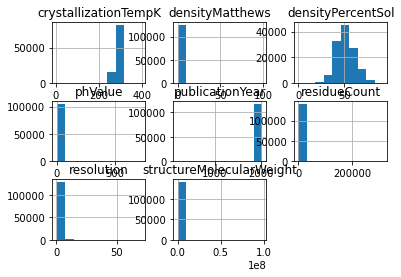

In [135]:
df1=df.copy()
df1.hist()

In [136]:
df.isnull().sum() 


structureId                     0
classification                  2
experimentalTechnique           0
macromoleculeType            3765
residueCount                    0
resolution                  12812
structureMolecularWeight        0
crystallizationMethod       45159
crystallizationTempK        44362
densityMatthews             16677
densityPercentSol           16652
pdbxDetails                 22867
phValue                     36291
publicationYear             23799
dtype: int64

In [137]:
df1["densityPercentSol"].fillna(df["densityPercentSol"].mean())

0         30.89
1         38.45
2         60.20
3         46.06
4         55.28
          ...  
141396    48.29
141397    61.18
141398    50.76
141399    55.93
141400    68.92
Name: densityPercentSol, Length: 141401, dtype: float64

In [147]:
df1["residueCount"].fillna(df1["residueCount"].median()) 
df1.residueCount

0           20
1           24
2          154
3           24
4          165
          ... 
141396     932
141397       0
141398     342
141399     388
141400    1572
Name: residueCount, Length: 141401, dtype: int64

In [139]:
df1['resolution'].interpolate(method='linear', inplace=True) 
df1.resolution

0         1.90
1         2.25
2         2.07
3         2.20
4         1.74
          ... 
141396    2.60
141397    2.20
141398    1.80
141399    1.90
141400    2.40
Name: resolution, Length: 141401, dtype: float64

In [148]:
df_num=df1.select_dtypes(include=["float64","int64"])
df_num=df_num.drop("phValue", 1)
df_num=df_num.drop("publicationYear", 1)

In [149]:
df_num.apply(lambda x:x.fillna(x.mean()),axis=0) 

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol
0,20,1.90,6360.30,290.967713,1.78,30.89
1,24,2.25,7939.35,290.967713,2.00,38.45
2,154,2.07,18112.80,290.967713,3.09,60.20
3,24,2.20,7637.17,277.000000,2.28,46.06
4,165,1.74,18926.61,290.967713,2.75,55.28
...,...,...,...,...,...,...
141396,932,2.60,101838.68,290.967713,2.38,48.29
141397,0,2.20,24244.34,290.967713,3.17,61.18
141398,342,1.80,34270.22,290.967713,2.50,50.76
141399,388,1.90,43542.29,290.967713,2.79,55.93


In [150]:
y = df["classification"]
x = df.drop("classification", 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [152]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")

In [153]:
print(imp.fit_transform(x_train))

[['1IHU' 'X-RAY DIFFRACTION' 'Protein' ...
  'PEG3000, ADP, AlCl3, NaF, MgCl2, NaAsO2, CdCl2, Bistrispropane, pH 8, VAPOR DIFFUSION, HANGING DROP, temperature 303K'
  8.0 2001.0]
 ['3UJI' 'X-RAY DIFFRACTION' 'Protein' ...
  '85mM Hepes-Na, 15% Glycerol, 17% PEG 4k, 8.5% Isopropanol, pH 7.5, EVAPORATION, temperature 296K'
  7.5 2011.0]
 ['3UBT' 'X-RAY DIFFRACTION' 'Protein#DNA' ...
  '26-27% (v/v) pentaerythritol ethoxylate (15/4 EO/OH), 100 mM ammonium sulfate, 50 mM Bis-Tris pH 6.5, VAPOR DIFFUSION, HANGING DROP, temperature 277K'
  6.5 2012.0]
 ...
 ['4ERL' 'X-RAY DIFFRACTION' 'RNA' ...
  '10 mM Na-HEPES pH 7.0, 2 M Li2SO4, and 5 mM MgCl2, VAPOR DIFFUSION, HANGING DROP, temperature 303K'
  7.0 2012.0]
 ['1SH7' 'X-RAY DIFFRACTION' 'Protein' ...
  'PEC 4000, isopropanol, HEPES, pH 8, VAPOR DIFFUSION, SITTING DROP, temperature 293K'
  8.0 2005.0]
 ['2X0C' 'X-RAY DIFFRACTION' 'Protein' ...
  '18% PEG 8K, 100MM TRIS, 180MM SODIUM PHOSPHATE DIBASIC, PH 8.5' 8.5
  2010.0]]


In [154]:
print(imp.transform(x_test))

[['5NAG' 'X-RAY DIFFRACTION' 'Protein' ...
  '20% glycerol, 14.4% PEG 8000, 0.08 M sodium cacodylate pH 6.5, 0.16 M calcium acetate or 20% glycerol, 16% PEG 8000, 0.08M sodium cacodylate pH 6.5, 0.16M magnesium acetate'
  6.5 2017.0]
 ['4XG8' 'X-RAY DIFFRACTION' 'Protein' ...
  '10~20%(v/v) PEG3350, 100 mM Tris-HCl' 8.5 2016.0]
 ['3E23' 'X-RAY DIFFRACTION' 'Protein' ...
  'Protein solution: 10 mM Tris (pH 7.5), 100 mM sodium chloride, 5 mM DTT, and 5 mM S-adenosyl-methionine. Resevoir solution: 100 mM HEPES (pH 7.5) and   2 M ammonium sulfate.   , microbatch under oil, temperature 277K'
  7.5 2017.0]
 ...
 ['1KFC' 'X-RAY DIFFRACTION' 'Protein' ...
  'PEG 8000, EDTA, SPERMINE, pH 7.8, VAPOR DIFFUSION, HANGING DROP, temperature 296K'
  7.8 2002.0]
 ['1L4D' 'X-RAY DIFFRACTION' 'Protein' ...
  'Li2SO4, Hepes, Mg Acetate, pH 7.0, VAPOR DIFFUSION, HANGING DROP, temperature 293.K'
  7.0 2002.0]
 ['5SYS' 'X-RAY DIFFRACTION' 'Protein' ...
  '100 mM MES pH 6, 8% PEG 3350, 10 mM NaOAc, 14% glycer

In [ ]:
!pip install fancyinpute

knn_imp=KNN(k=5).fit_transform(x_train)

In [155]:
df_num=df.select_dtypes(include=["float64","int64"])
df_num=df_num.drop("phValue", 1)
df_num=df_num.drop("publicationYear", 1)

In [ ]:
!pip install ycimpute.imputer import iterforest
var_names=list(df_num)
n_df=np.array(df_num)
dff=iterforest.IterImput().complete(n_df)
dff=pd.DataFrame(dff,columns=var_names)